In [1]:
import pandas as pd

## **1.2 Feature Engineering**

Cargamos el dataset filtrado

In [2]:
data_fil= pd.read_csv("../dataset/data_fil.csv")
data_fil

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Maize,1991,29068,1485.0,121.00,15.36
2,Albania,Maize,1992,24876,1485.0,121.00,16.06
3,Albania,Maize,1993,24185,1485.0,121.00,16.05
4,Albania,Maize,1994,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...
4116,Zimbabwe,Maize,2009,4642,657.0,3269.99,20.52
4117,Zimbabwe,Maize,2010,8751,657.0,3305.17,21.17
4118,Zimbabwe,Maize,2011,6568,657.0,3340.35,20.78
4119,Zimbabwe,Maize,2012,7912,657.0,3375.53,20.52


In [3]:
len(data_fil)

4121

### **Feature obtenida de una fuente externa**

**Se incorporó al dataset una nueva variable obtenida a partir de la base de datos de FAOSTAT, correspondiente al uso de fertilizantes a base de nitrógeno, con el objetivo de mejorar la capacidad predictiva del modelo sobre el rendimiento del cultivo.**

In [4]:
fertilizer= pd.read_csv("../dataset/fertilizer.csv")

In [36]:
fertilizer

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RFN,Fertilizers by Nutrient,4,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1990,1990,kg/ha,5.49,E,Estimated value,NaN
1,RFN,Fertilizers by Nutrient,4,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1991,1991,kg/ha,5.33,E,Estimated value,NaN
2,RFN,Fertilizers by Nutrient,4,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1992,1992,kg/ha,4.84,E,Estimated value,NaN
3,RFN,Fertilizers by Nutrient,4,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1993,1993,kg/ha,5.04,E,Estimated value,NaN
4,RFN,Fertilizers by Nutrient,4,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1996,1996,kg/ha,0.64,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,RFN,Fertilizers by Nutrient,716,Zimbabwe,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),2009,2009,kg/ha,15.98,E,Estimated value,NaN
4345,RFN,Fertilizers by Nutrient,716,Zimbabwe,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),2010,2010,kg/ha,17.46,E,Estimated value,NaN
4346,RFN,Fertilizers by Nutrient,716,Zimbabwe,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),2011,2011,kg/ha,14.06,E,Estimated value,NaN
4347,RFN,Fertilizers by Nutrient,716,Zimbabwe,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),2012,2012,kg/ha,10.02,E,Estimated value,NaN


In [5]:
fertilizer_fil=fertilizer[["Area", "Year", "Value"]]

In [6]:
fertilizer_fil.rename(columns={"Value": "N_kg/ha"}, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
fertilizer_fil

,Area,Year,N_kg/ha
0,Afghanistan,1990,5.49
1,Afghanistan,1991,5.33
2,Afghanistan,1992,4.84
3,Afghanistan,1993,5.04
4,Afghanistan,1996,0.64
...,...,...,...
4344,Zimbabwe,2009,15.98
4345,Zimbabwe,2010,17.46
4346,Zimbabwe,2011,14.06
4347,Zimbabwe,2012,10.02


In [7]:
fertilizer_fil["N_kg/ha"].describe()

count    4349.000000
mean       62.442417
std       250.908577
min         0.000000
25%         5.350000
50%        31.380000
75%        71.620000
max      7177.780000
Name: N_kg/ha, dtype: float64

In [8]:
data_merge= pd.merge(data_fil, fertilizer_fil,  on=["Area", "Year"], how="left")

In [9]:
data_merge

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,104.40
1,Albania,Maize,1991,29068,1485.0,121.00,15.36,31.72
2,Albania,Maize,1992,24876,1485.0,121.00,16.06,21.05
3,Albania,Maize,1993,24185,1485.0,121.00,16.05,21.68
4,Albania,Maize,1994,25848,1485.0,201.00,16.96,18.06
...,...,...,...,...,...,...,...,...
4116,Zimbabwe,Maize,2009,4642,657.0,3269.99,20.52,15.98
4117,Zimbabwe,Maize,2010,8751,657.0,3305.17,21.17,17.46
4118,Zimbabwe,Maize,2011,6568,657.0,3340.35,20.78,14.06
4119,Zimbabwe,Maize,2012,7912,657.0,3375.53,20.52,10.02


In [52]:
len(data_merge)

4121

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

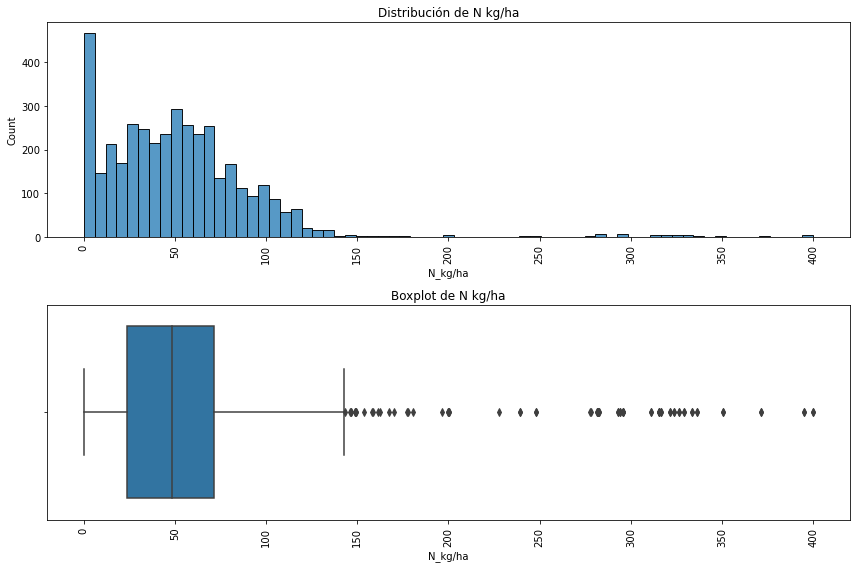

In [31]:
ig, axes = plt.subplots(2, 1, figsize=(12, 8))  

sns.histplot(data=data_merge, x="N_kg/ha", ax=axes[0])
axes[0].set_title('Distribución de N kg/ha')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=data_merge, x="N_kg/ha", ax=axes[1])
axes[1].set_title('Boxplot de N kg/ha')  
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [32]:
data_merge["N_kg/ha"].describe()

count    3953.000000
mean       52.454027
std        44.683264
min         0.000000
25%        23.460000
50%        48.170000
75%        71.310000
max       400.000000
Name: N_kg/ha, dtype: float64

In [34]:
none=data_merge[data_merge["N_kg/ha"]==0]
none

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha
937,Central African Republic,Maize,2002,9826,1342.0,22.87,25.44,0.0


In [35]:
fil=data_merge[data_merge["N_kg/ha"]>150]
fil

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha
408,Belgium,Maize,2002,111962,847.0,9204.00,11.44,177.11
409,Belgium,Maize,2004,122246,847.0,9186.00,10.94,170.26
410,Belgium,Maize,2005,116872,847.0,9776.00,11.16,167.56
411,Belgium,Maize,2006,101929,847.0,8244.02,11.48,162.19
412,Belgium,Maize,2007,131278,847.0,6712.05,11.52,177.56
...,...,...,...,...,...,...,...,...
1466,Guyana,Maize,2004,12500,2387.0,289.90,27.45,153.47
3460,Qatar,Maize,1994,124074,74.0,3.00,27.59,400.00
3461,Qatar,Maize,1995,125806,74.0,4.00,27.16,400.00
3820,Suriname,Maize,2008,22500,2331.0,2108.66,27.22,277.88


In [136]:
data_merge.isna().sum()

Area                               0
Item                               0
Year                               0
hg/ha_yield                        0
average_rain_fall_mm_per_year      0
pesticides_tonnes                  0
avg_temp                           0
N_kg/ha                          168
dtype: int64

##### Visualización de datos faltantes en el dataset

<AxesSubplot:>

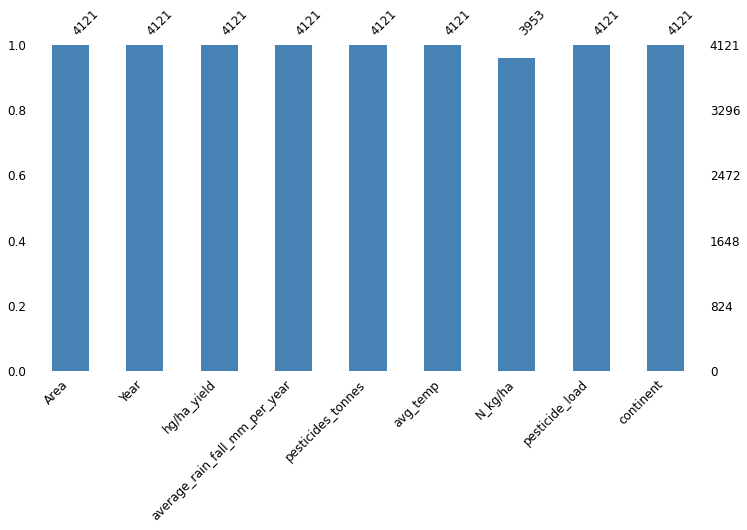

In [124]:
import missingno as msno
msno.bar(data_merge,figsize=(12, 6), fontsize=12, color='steelblue')

<AxesSubplot:>

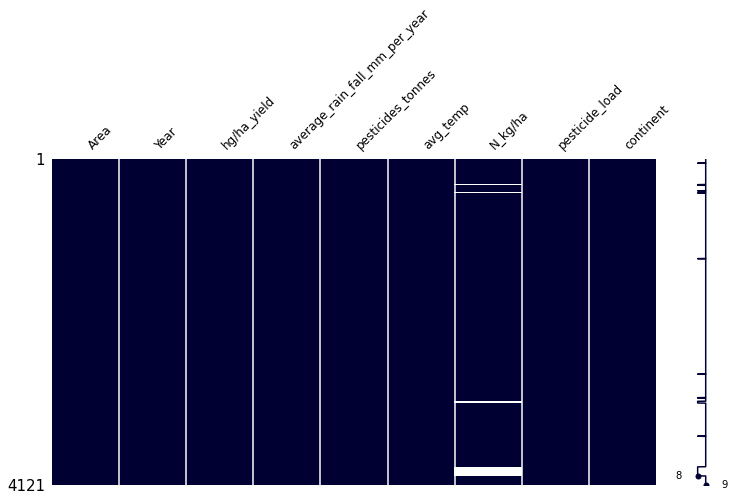

In [125]:
msno.matrix(data_merge,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

In [129]:
miss=data_merge[pd.isna(data_merge["N_kg/ha"])]
miss

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha,pesticide_load,continent
57,Angola,2001,5754,1010.0,40.00,24.43,NaN,low,Africa
328,Bahamas,2002,30500,1292.0,384.23,25.79,NaN,low,America
329,Bahamas,2004,35500,1292.0,269.66,25.46,NaN,low,America
330,Bahamas,2005,36000,1292.0,315.74,25.43,NaN,low,America
331,Bahamas,2006,38000,1292.0,268.20,25.34,NaN,low,America
...,...,...,...,...,...,...,...,...,...
4003,Turkey,2013,89499,593.0,39440.00,20.22,NaN,medium,Asia
4004,Turkey,2013,89499,593.0,39440.00,13.27,NaN,medium,Asia
4005,Turkey,2013,89499,593.0,39440.00,14.07,NaN,medium,Asia
4006,Turkey,2013,89499,593.0,39440.00,16.02,NaN,medium,Asia


In [130]:
miss.Area.unique()

array(['Angola', 'Bahamas', 'Belgium', 'Botswana', 'Eritrea',
       'Mauritania', 'Namibia', 'Netherlands', 'Rwanda', 'Turkey'],
      dtype=object)

In [10]:
data_merge_fil=data_merge.dropna() ##Eliminamos valores NA

In [11]:
len(data_merge_fil)

3953

In [150]:
misspais=list(set(data_merge.Area.unique()) - set(data_merge_fil.Area.unique()))
misspais

['Netherlands', 'Turkey']

**Los casos faltantes representan una proporción baja del total (168 de 4121, equivalente al 4%). Sin embargo, estos valores no están distribuidos aleatoriamente, sino que en dos de los 10 países donde se detectaron NA no se registró ningún dato de fertilizante. Dado que considero que la variable 'fertilizante' es relevante para la predicción, el criterio adoptado en este caso es eliminar dichos casos completos del análisis.**

In [167]:
data_merge_fil.isna().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
N_kg/ha                          0
pesticide_load                   0
continent                        0
dtype: int64

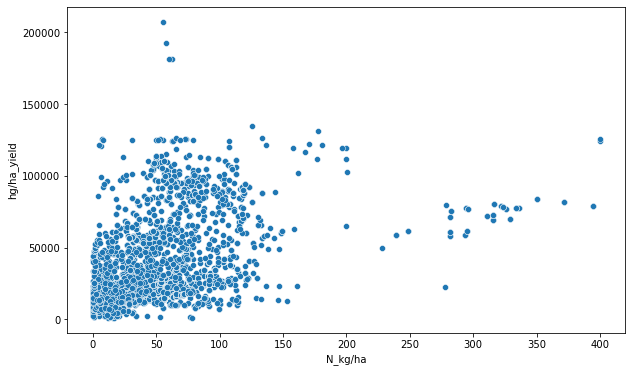

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data_merge_fil, x="N_kg/ha", y="hg/ha_yield")
plt.xlabel("N_kg/ha")
plt.ylabel("hg/ha_yield")
plt.title("")
plt.show()

### **Vamos a crear nuevas features a partir de las variables que ya tenermos:**

**1. Creamos la variable carga de pesticidas "pesticide_load" , nos permite agrupar por tipo de aplicaciones**

In [151]:
data_merge_fil.pesticides_tonnes.describe()

count      3953.000000
mean      33135.382942
std       55116.806807
min           0.040000
25%        1597.000000
50%       13697.000000
75%       44957.520000
max      367778.000000
Name: pesticides_tonnes, dtype: float64

In [12]:
data_merge_fil["pesticide_load"]=data_merge_fil["pesticides_tonnes"]

<ipython-input-12-27328c35b567>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_fil["pesticide_load"]=data_merge_fil["pesticides_tonnes"]


In [155]:
data_merge_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953 entries, 0 to 4120
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           3953 non-null   object 
 1   Item                           3953 non-null   object 
 2   Year                           3953 non-null   int64  
 3   hg/ha_yield                    3953 non-null   int64  
 4   average_rain_fall_mm_per_year  3953 non-null   float64
 5   pesticides_tonnes              3953 non-null   float64
 6   avg_temp                       3953 non-null   float64
 7   N_kg/ha                        3953 non-null   float64
 8   pesticide_load                 3953 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 468.8+ KB


In [13]:
bins = [0, 5000, 40000, float('inf')]
labels = ['low', 'medium', 'high']

data_merge_fil['pesticide_load'] = pd.cut(
    data_merge_fil['pesticide_load'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

<ipython-input-13-60989f2f73f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_fil['pesticide_load'] = pd.cut(


In [158]:
data_merge_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953 entries, 0 to 4120
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Area                           3953 non-null   object  
 1   Item                           3953 non-null   object  
 2   Year                           3953 non-null   int64   
 3   hg/ha_yield                    3953 non-null   int64   
 4   average_rain_fall_mm_per_year  3953 non-null   float64 
 5   pesticides_tonnes              3953 non-null   float64 
 6   avg_temp                       3953 non-null   float64 
 7   N_kg/ha                        3953 non-null   float64 
 8   pesticide_load                 3953 non-null   category
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 441.9+ KB


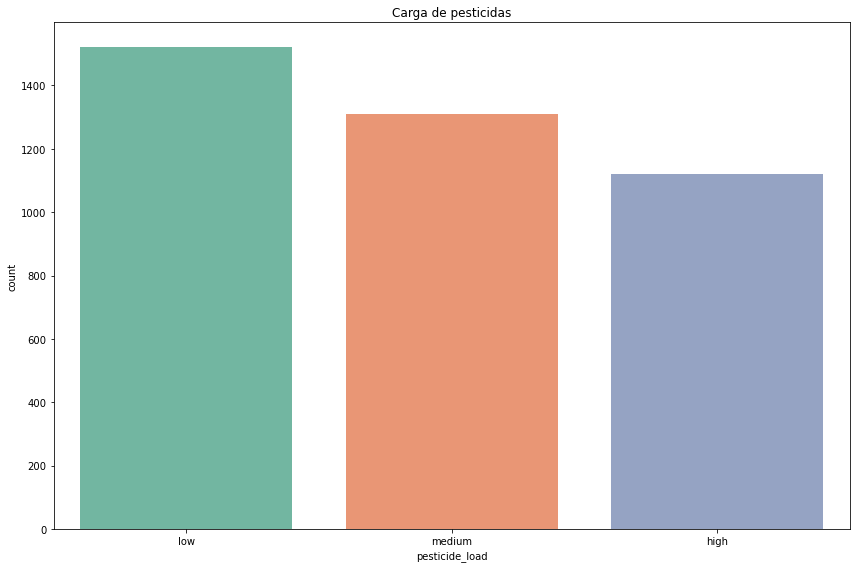

In [18]:
fig, ax = plt.subplots(figsize=(12, 8)) 

sns.countplot(x=data_merge_fil['pesticide_load'], ax=ax, palette='Set2')
ax.set_title('Carga de pesticidas')
ax.tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

**1. Creamos la variable continente  "continent" debido a la gran cantidad de países que existen en el dataset**

In [77]:
pip install country_converter 

Note: you may need to restart the kernel to use updated packages.


In [19]:
import country_converter as coco #A esta función la encontré con ayuda del chat gpt

data_merge_fil['continent'] = coco.convert(names=data_merge_fil['Area'], to='continent')

<ipython-input-19-e5802593462c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_fil['continent'] = coco.convert(names=data_merge_fil['Area'], to='continent')


In [20]:
data_merge_fil['continent'].unique() 

array(['Europe', 'Africa', 'America', 'Asia', 'Oceania'], dtype=object)

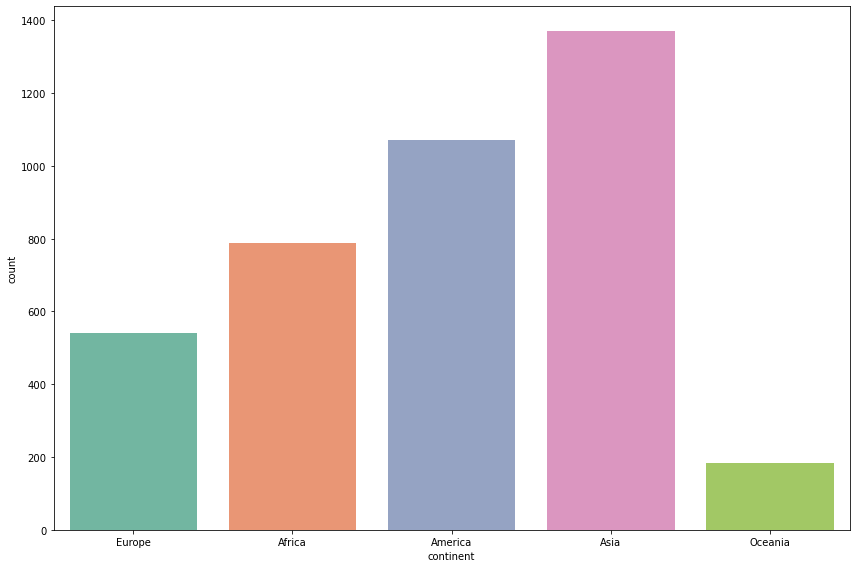

In [21]:
fig, ax = plt.subplots(figsize=(12, 8)) 

sns.countplot(x=data_merge_fil["continent"], ax=ax, palette='Set2')
ax.set_title('')
ax.tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

In [22]:
data_merge_fil=data_merge_fil.drop(["Item"], axis=1)
data_merge_fil

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha,pesticide_load,continent
0,Albania,1990,36613,1485.0,121.00,16.37,104.40,low,Europe
1,Albania,1991,29068,1485.0,121.00,15.36,31.72,low,Europe
2,Albania,1992,24876,1485.0,121.00,16.06,21.05,low,Europe
3,Albania,1993,24185,1485.0,121.00,16.05,21.68,low,Europe
4,Albania,1994,25848,1485.0,201.00,16.96,18.06,low,Europe
...,...,...,...,...,...,...,...,...,...
4116,Zimbabwe,2009,4642,657.0,3269.99,20.52,15.98,low,Africa
4117,Zimbabwe,2010,8751,657.0,3305.17,21.17,17.46,low,Africa
4118,Zimbabwe,2011,6568,657.0,3340.35,20.78,14.06,low,Africa
4119,Zimbabwe,2012,7912,657.0,3375.53,20.52,10.02,low,Africa


In [23]:
data_merge_fil.to_csv("../dataset/df_final_st.csv", index=False)

## **Ahora si vamos a transformar las variables predictoras**

In [170]:
data_merge_fil.columns

Index(['Area', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'N_kg/ha', 'pesticide_load',
       'continent'],
      dtype='object')

## 1. Estandarización de las variables numéricas 

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_merge_fil[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'N_kg/ha']])

df_num = pd.DataFrame(scaled, columns=['Year_sc', 'average_rain_fall_mm_per_year_sc', 'pesticides_tonnes_sc', 'avg_temp_sc', 'N_kg/ha_sc'])
df_num 

,Year_sc,average_rain_fall_mm_per_year_sc,pesticides_tonnes_sc,avg_temp_sc,N_kg/ha_sc
0,0.000000,0.449671,0.000329,0.508264,0.261000
1,0.043478,0.449671,0.000329,0.473485,0.079300
2,0.086957,0.449671,0.000329,0.497590,0.052625
3,0.130435,0.449671,0.000329,0.497245,0.054200
4,0.173913,0.449671,0.000546,0.528581,0.045150
...,...,...,...,...,...
3948,0.826087,0.190028,0.008891,0.651171,0.039950
3949,0.869565,0.190028,0.008987,0.673554,0.043650
3950,0.913043,0.190028,0.009082,0.660124,0.035150
3951,0.956522,0.190028,0.009178,0.651171,0.025050


## 2. Codificamos las variables categóricas

In [173]:
from sklearn.preprocessing import OneHotEncoder

In [175]:
cat_cols = ['Area', 'pesticide_load', 'continent']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(data_merge_fil[cat_cols])

# Ver categorías por variable
print(encoder.categories_)

[array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kenya', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar',
       'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Niger', 'Pakistan',
       'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Slo

In [176]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))
encoded_df 

,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,Area_Bahamas,Area_Bangladesh,...,Area_Zambia,Area_Zimbabwe,pesticide_load_high,pesticide_load_low,pesticide_load_medium,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3. Unimos features cuantitavas estandarizadas y variables categóricas codificadas

In [177]:
df_final = pd.concat([df_num, encoded_df], axis=1)

In [178]:
df_final

,Year_sc,average_rain_fall_mm_per_year_sc,pesticides_tonnes_sc,avg_temp_sc,N_kg/ha_sc,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Area_Zambia,Area_Zimbabwe,pesticide_load_high,pesticide_load_low,pesticide_load_medium,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,0.000000,0.449671,0.000329,0.508264,0.261000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.043478,0.449671,0.000329,0.473485,0.079300,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.086957,0.449671,0.000329,0.497590,0.052625,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.130435,0.449671,0.000329,0.497245,0.054200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.173913,0.449671,0.000546,0.528581,0.045150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.826087,0.190028,0.008891,0.651171,0.039950,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3949,0.869565,0.190028,0.008987,0.673554,0.043650,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3950,0.913043,0.190028,0.009082,0.660124,0.035150,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3951,0.956522,0.190028,0.009178,0.651171,0.025050,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [179]:
len(df_final.columns)

103

In [180]:
df_final.isna().sum()

Year_sc                             0
average_rain_fall_mm_per_year_sc    0
pesticides_tonnes_sc                0
avg_temp_sc                         0
N_kg/ha_sc                          0
                                   ..
continent_Africa                    0
continent_America                   0
continent_Asia                      0
continent_Europe                    0
continent_Oceania                   0
Length: 103, dtype: int64

## 4. Reducimos la dimensionalidad de los datos con PCA

In [181]:
from sklearn.decomposition import PCA

In [182]:
pca = PCA(n_components=15)
pca.fit(df_final)
proyected_features = pca.transform(df_final)
proyected_features.shape

(3953, 15)

In [183]:
pca.explained_variance_ratio_

array([0.17457547, 0.15350007, 0.12653772, 0.07409177, 0.0628815 ,
       0.03600072, 0.0323089 , 0.02903181, 0.02538781, 0.02088355,
       0.01771383, 0.01328805, 0.01155591, 0.00814168, 0.00777849])

Text(0.5, 0, 'Components')

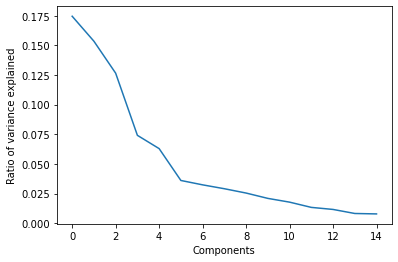

In [184]:
sns.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

##### Según el gráfico de codo, las tres primeras componentes principales explicarían la mayor parte de la varianza, podrían ser 5 también

In [185]:
df_final[['pca1_scaled', 'pca2_scaled', 'pca3_scaled']] = proyected_features[:,:3]

In [186]:
df_final.columns

Index(['Year_sc', 'average_rain_fall_mm_per_year_sc', 'pesticides_tonnes_sc',
       'avg_temp_sc', 'N_kg/ha_sc', 'Area_Albania', 'Area_Algeria',
       'Area_Angola', 'Area_Argentina', 'Area_Armenia',
       ...
       'pesticide_load_low', 'pesticide_load_medium', 'continent_Africa',
       'continent_America', 'continent_Asia', 'continent_Europe',
       'continent_Oceania', 'pca1_scaled', 'pca2_scaled', 'pca3_scaled'],
      dtype='object', length=106)

In [235]:
features=df_final

In [236]:
features=pd.DataFrame(features)

In [237]:
features=features.reset_index(drop=True)

In [238]:
target=data_merge_fil[["hg/ha_yield"]]

In [239]:
target=pd.DataFrame(target)

In [240]:
target=target.reset_index(drop=True)

In [241]:
data_final = pd.concat([features, target], axis=1)

In [242]:
data_final

,Year_sc,average_rain_fall_mm_per_year_sc,pesticides_tonnes_sc,avg_temp_sc,N_kg/ha_sc,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,pesticide_load_medium,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania,pca1_scaled,pca2_scaled,pca3_scaled,hg/ha_yield
0,0.000000,0.449671,0.000329,0.508264,0.261000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.698031,0.055034,0.118221,36613
1,0.043478,0.449671,0.000329,0.473485,0.079300,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.703225,0.063098,0.126988,29068
2,0.086957,0.449671,0.000329,0.497590,0.052625,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.704007,0.058940,0.130428,24876
3,0.130435,0.449671,0.000329,0.497245,0.054200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.703289,0.058074,0.131738,24185
4,0.173913,0.449671,0.000546,0.528581,0.045150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.703551,0.052442,0.134614,25848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.826087,0.190028,0.008891,0.651171,0.039950,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.084811,-0.044914,0.252353,4642
3949,0.869565,0.190028,0.008987,0.673554,0.043650,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.084453,-0.049387,0.254322,8751
3950,0.913043,0.190028,0.009082,0.660124,0.035150,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.083827,-0.048007,0.255686,6568
3951,0.956522,0.190028,0.009178,0.651171,0.025050,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.083346,-0.047298,0.257271,7912


In [243]:
data_final.to_csv("../dataset/df_final.csv", index=False)